<a href="https://colab.research.google.com/github/spiousjoseph/CSCI4050ML/blob/master/100555297mnist_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural network models for the MNIST model

In [2]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


# ⚠️ You are only allowed to work with the imported layers to build your neural network.

In [0]:
import tensorflow as tf
import matplotlib.pyplot as pl
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Reshape, Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import mnist

np.set_printoptions(suppress=True, precision=2)

# ✎ Import the MNIST dataset.

**Note** You must renormalize the pixel values to 1.0.  This involves dividing the image tensors by 255.

Load the data into variables:

- `x_train`
- `y_train`
- `x_test`
- `y_test`

In [4]:
# Load the data into x_train, y_train, x_test, y_test
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
# Normalize the image pixels in x_train and y_train to 0 to 1.
x_train = x_train / 255
x_test = x_test / 255
# complete


# ✎ Plot the digit images

You must plot, in a grid of subplots with layout (2, 5), **one** image
for each digit from 0 .. 9.

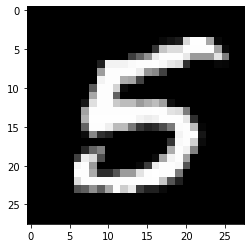

In [6]:
# Plot one image per different digit in a 2x5 subplot layout.
pl.imshow(x_train[20000], cmap='gray');
#
# complete

# ✎ MLP with four layers

Construct a model, `model1`, that is a 4-layer MLP.  

- It maps the digit images to a probability distribution
over 10 classes, corresponding to 0..9.

- The model consists of *four* dense layers, each with 10 neurons.
Only the last layer uses activation function (`softmax`), while
the others do not use activation functions.

- Compile the model with the `sparse_categorical_crossentropy` loss function and
`Adam` optimizer.  Also include the accuracy metrics (`acc`) in the compiled model.

- Use `model1.summary()` to show the description of the model

In [49]:
# Construct the first model.
#
# Compile with sparse categorical crossentropy, and adam optimizer, and the 'acc' metric.
#
# complete
#
model1 = Sequential([
    Input((28, 28)),
    Reshape((784,)),
    Dense(10),
    Dense(10),
    Dense(10),
    Dense(10, activation='softmax')
    #Reshape((280,))
])
model1.compile(loss=tf.losses.sparse_categorical_crossentropy, optimizer='adam', metrics=['acc'])
model1.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_4 (Reshape)          (None, 784)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 10)                7850      
_________________________________________________________________
dense_18 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_19 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_20 (Dense)             (None, 10)                110       
Total params: 8,180
Trainable params: 8,180
Non-trainable params: 0
_________________________________________________________________


# ✎ Training

- Train the model, with `x_train` and `y_train`.
- Use 10 epochs.
- Use 10% of the training data for cross validation.
- Save the history of the training as variable `history1`.

In [0]:
split = tf.math.floor(x_train.shape[0]*0.1)
data_train = x_train[:split]
data_test = x_train[split:]

def fold_i_of_k(dataset, i, k):
    n = len(dataset)
    return dataset[n*(i-1)//k:n*i//k]

In [9]:
abc = fold_i_of_k(x_train, 10, 10)
abc.shape

(6000, 28, 28)

In [50]:
# Train the model with the training data
# - Use 10% cross validation
# - 10 epochs
# - Save the history
#
# complete
#
history1 = model1.fit(x_train, y_train, epochs=10, validation_split=0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 5s 86us/sample - loss: 0.5321 - acc: 0.8393 - val_loss: 0.3070 - val_acc: 0.9125
Epoch 2/10
54000/54000 [==============================] - 4s 78us/sample - loss: 0.3548 - acc: 0.8983 - val_loss: 0.2919 - val_acc: 0.9182
Epoch 3/10
54000/54000 [==============================] - 4s 78us/sample - loss: 0.3249 - acc: 0.9087 - val_loss: 0.2681 - val_acc: 0.9238
Epoch 4/10
54000/54000 [==============================] - 4s 77us/sample - loss: 0.3131 - acc: 0.9124 - val_loss: 0.2683 - val_acc: 0.9245
Epoch 5/10
54000/54000 [==============================] - 4s 78us/sample - loss: 0.3066 - acc: 0.9138 - val_loss: 0.2661 - val_acc: 0.9253
Epoch 6/10
54000/54000 [==============================] - 4s 78us/sample - loss: 0.3037 - acc: 0.9147 - val_loss: 0.2585 - val_acc: 0.9293
Epoch 7/10
54000/54000 [==============================] - 4s 82us/sample - loss: 0.3003 - acc: 0.9162 - val_loss: 0.2

# ✎ Plot the accuracy and cross validation accuracy in two separate plots

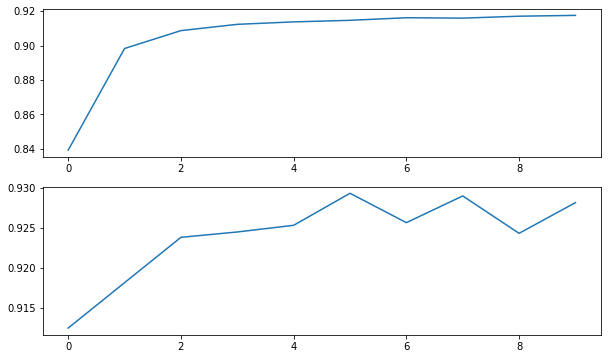

In [51]:
# Plot the training accuracy and cross validation accuracy
# Make two separate plots
#
# complete
#
pl.figure(figsize=(10, 6))
pl.subplot(2,1,1)
pl.plot(history1.history['acc']);

pl.subplot(2,1,2)
pl.plot(history1.history['val_acc']);

# ✎ Conclusion on overfitting

Do you think the model has overfitted to the training data?

## Your answer here:

*The model seems to have low accuracy but may improve upon by increasing the epochs
*
*
*
*




# ✎ Evaluate the model using the test data.

- Save the test accuracy in the variable `acc_test1`

In [52]:
# Evaluate the test accuracy using the test data x_test and y_test.
#
# complete
#

test_loss, acc_test1 = model1.evaluate(x_test, y_test, verbose=2)
acc_test1

10000/1 - 0s - loss: 0.1942 - acc: 0.9125


0.9125

# ✎ MLP with non-linear activation

- Construct a MLP with the same architecture as `model1`, except
that all **internal** layers use `relu` non-linear activation functions.

- Assign the model the variable `model2`.

- Use `model2.summary()` to show the model description.

In [59]:
# Construct the second model
#
# Compile with sparse_categorical_crossentropy, adam optimizer and the 'acc' metrics
#
# complete
#

model2 = Sequential([
    Input((28, 28)),
    Reshape((784,)),
    Dense(10, activation='relu'),
    Dense(10, activation='relu'),
    Dense(10, activation='relu'),
    Dense(10, activation='softmax')
    #Reshape((280,))
])
model2.compile(loss=tf.losses.sparse_categorical_crossentropy, optimizer='adam', metrics=['acc'])
model2.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_5 (Reshape)          (None, 784)               0         
_________________________________________________________________
dense_25 (Dense)             (None, 10)                7850      
_________________________________________________________________
dense_26 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_27 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_28 (Dense)             (None, 10)                110       
Total params: 8,180
Trainable params: 8,180
Non-trainable params: 0
_________________________________________________________________


# ✎ Train the model

- 10 epochs
- 10% cross-validation
- Save the history in `history2`.

In [60]:
# Train the model with the training data
# - Use 10% cross validation
# - 10 epochs
# - Save the history
#
# complete
#
history2 = model2.fit(x_train, y_train, epochs=10, validation_split=0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 5s 93us/sample - loss: 0.7057 - acc: 0.7817 - val_loss: 0.3433 - val_acc: 0.9077
Epoch 2/10
54000/54000 [==============================] - 4s 79us/sample - loss: 0.3737 - acc: 0.8961 - val_loss: 0.2891 - val_acc: 0.9192
Epoch 3/10
54000/54000 [==============================] - 4s 79us/sample - loss: 0.3212 - acc: 0.9091 - val_loss: 0.2509 - val_acc: 0.9312
Epoch 4/10
54000/54000 [==============================] - 4s 80us/sample - loss: 0.2900 - acc: 0.9178 - val_loss: 0.2387 - val_acc: 0.9335
Epoch 5/10
54000/54000 [==============================] - 4s 79us/sample - loss: 0.2646 - acc: 0.9252 - val_loss: 0.2302 - val_acc: 0.9352
Epoch 6/10
54000/54000 [==============================] - 4s 80us/sample - loss: 0.2502 - acc: 0.9289 - val_loss: 0.2138 - val_acc: 0.9408
Epoch 7/10
54000/54000 [==============================] - 4s 78us/sample - loss: 0.2357 - acc: 0.9328 - val_loss: 0.2

# ✎ Plot the accuracy and cross validation accuracy in two separate plots

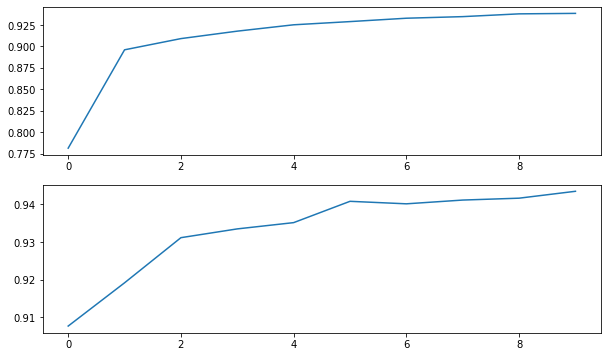

In [61]:
# Plot the training accuracy and cross validation accuracy
# Make two separate plots
#
# complete
#
pl.figure(figsize=(10, 6))
pl.subplot(2,1,1)
pl.plot(history2.history['acc']);

pl.subplot(2,1,2)
pl.plot(history2.history['val_acc']);

# ✎ Conclusion on overfitting

Do you think the model has overfitted?

## Your answer goes here.

The Model's accuracy is terrible and doesn't seem to hold much.
*
*
*
*
*

# ✎ Evaluate `model2` with test data.

- Save the test accuracy in the variable `acc_test2`

In [62]:
# Evaluate the test accuracy using the test data x_test and y_test.
#
# complete
#
test_loss, acc_test2 = model2.evaluate(x_test, y_test, verbose=2)
acc_test2

10000/1 - 0s - loss: 0.1453 - acc: 0.9342


0.9342

# ✎ Convolutional Networks

Build a convolutional network with the following architecture.

- Uses a Conv2D layer with 32 filters, each with kernel size of (3,3).
- Uses a MaxPool2D layer with pool size of (2,2).
- Uses a dense layer to generate the output.
- You must use `Reshape` layers whenever necessary to ensure the shapes of the tensors are suitable
for downstream layers.
- Assign the model as `model3`.
- Compile the model as before.

In [17]:
# Construct the second model
#
# Compile with sparse_categorical_crossentropy, adam optimizer and the 'acc' metrics
#
# complete
#
model3 = Sequential([
    Input((28, 28)),
    Reshape((28, 28, 1)),
    Conv2D(32, kernel_size=(3, 3), padding='valid'),
    MaxPool2D(pool_size=(2,2)),
    Reshape((5408,)),
    Dense(10, activation='softmax')
])
model3.compile(loss=tf.losses.sparse_categorical_crossentropy, optimizer='adam', metrics=['acc'])
model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_2 (Reshape)          (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
reshape_3 (Reshape)          (None, 5408)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 10)                54090     
Total params: 54,410
Trainable params: 54,410
Non-trainable params: 0
_________________________________________________________________


In [18]:
model3.output_shape

(None, 10)

# ✎ Train the model

- 10 epochs
- 10% cross-validation
- Save the history as `history3`

In [19]:
# Train the model with the training data
# - Use 10% cross validation
# - 10 epochs
# - Save the history
#
# complete
#
history3 = model3.fit(x_train, y_train, epochs=10, validation_split=0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 23s 419us/sample - loss: 0.2795 - acc: 0.9196 - val_loss: 0.1180 - val_acc: 0.9695
Epoch 2/10
54000/54000 [==============================] - 22s 404us/sample - loss: 0.1234 - acc: 0.9641 - val_loss: 0.0917 - val_acc: 0.9748
Epoch 3/10
54000/54000 [==============================] - 22s 405us/sample - loss: 0.0877 - acc: 0.9746 - val_loss: 0.0763 - val_acc: 0.9777
Epoch 4/10
54000/54000 [==============================] - 22s 405us/sample - loss: 0.0711 - acc: 0.9784 - val_loss: 0.0735 - val_acc: 0.9795
Epoch 5/10
54000/54000 [==============================] - 22s 408us/sample - loss: 0.0620 - acc: 0.9807 - val_loss: 0.0690 - val_acc: 0.9800
Epoch 6/10
54000/54000 [==============================] - 22s 410us/sample - loss: 0.0529 - acc: 0.9832 - val_loss: 0.0662 - val_acc: 0.9815
Epoch 7/10
54000/54000 [==============================] - 22s 406us/sample - loss: 0.0470 - acc: 0.9847 -

# ✎ Plot the accuracy and cross validation accuracy in two separate plots

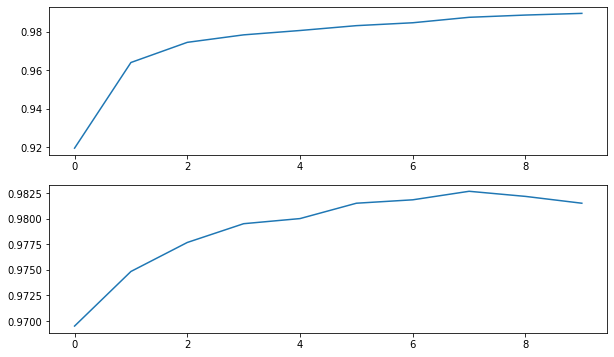

In [20]:
# Plot the training accuracy and cross validation accuracy
# Make two separate plots
#
# complete
#
pl.figure(figsize=(10, 6))
pl.subplot(2,1,1)
pl.plot(history3.history['acc']);

pl.subplot(2,1,2)
pl.plot(history3.history['val_acc']);

# ✎ Conclusion on overfitting

Do you think the model has overfitted?

## Your answer goes here.

Out of all the models, model3 works best and is the most accurate of all of them
*
*
*
*

# ✎ Evaluate `model2` with test data.

- Save the test accuracy in the variable `acc_test3`

In [21]:
# Evaluate the test accuracy using the test data x_test and y_test.
#
# complete
#
test_loss, acc_test3 = model3.evaluate(x_test, y_test, verbose=2)
acc_test3

10000/1 - 2s - loss: 0.0387 - acc: 0.9782


0.9782

# Comparative study

# ✎ Define a function that computes a _confusion matrix_.

Define a function `confusion_matrix(model)` as follows:

**Input**

- model: a MNIST classifier

**Returns**

- A (10,10) matrix of **int** which is the _confusion matrix_ with respect to the training
data of `(x_test, y_test)`.

The confusion matrix $C$ is defined as:  $C[i][j]$ is the number of
instances that digit $i$ is mistaken as $j$.  We **require** $C[i][i] = 0$ for all $i$.

In [0]:
#
# complete
#
def confusion_matrix(model):
  actual = y_test
  predicted = model.predict(x_test)
  a = tf.constant(actual)
  b = tf.constant(predicted)
  c = tf.expand_dims(a, 1)
  results = tf.math.confusion_matrix(labels=tf.argmax(c, 1), predictions=tf.argmax(b, 1)) 
  return results
    

# ✎ Define a function of printing _bad_ images of digit

Define a function `show_bad(model, digit)` to show 9 images of digit that have
been incorrectly classified.

**Input**:

- model: the classifier
- digit: the digit that the images belong to.  digit=0, 1, ... 9.

**Output**:

- None

The function plots in a 3x3 subplot layout 9 images that have been badly classified.  All 9 images are
supposed to be `digit`.

In [0]:
#
# complete
#
def show_bad(model, digit):
  predicted = model.predict(x_train)
  result = np.absolute(y_train-predicted)
  figure = pl.figure(figsize=(10,10))
  for i in range(9):
    # Start next subplot.
    pl.subplot(digit, digit, i + 1)
    pl.xticks([])
    pl.yticks([])
    pl.grid(False)
    pl.imshow(train[i], cmap='gray');

# ✎ Apply to models

- Compute the confusion matrices of all three models.
- Save them as variables `confusion1`, `confusion2` and `confusion3`.

# ✎ Show the bad digits of all three models

- Apply the `show_bad` to all three models

In [24]:
confusion1 = confusion_matrix(model1)
confusion1

<tf.Tensor: id=176796, shape=(262, 262), dtype=int32, numpy=
array([[   0, 1060,    0, ...,    0,    0,    6],
       [   0,    0,    0, ...,    0,    0,    0],
       [   0,    0,    0, ...,    0,    0,    0],
       ...,
       [   0,    0,    0, ...,    0,    0,    0],
       [   0,    0,    0, ...,    0,    0,    0],
       [   0,    0,    0, ...,    0,    0,    0]], dtype=int32)>

In [25]:
show_bad(model1, digit=3)

ValueError: ignored

In [0]:
confusion2 = confusion_matrix(model2)
confusion2

In [0]:
show_bad(model2, digit=3)

In [0]:
confusion3 = confusion_matrix(model3)
confusion3

In [0]:
show_bad(model3, digit=3)

In [0]:
# Conclusion

Draw your conclusions about the three models based on your observations of:

- Test accuracies
- Confusion matrices
- The mistakes the three models make

## Your answer goes here

Model accuracy was not well done. It needed more than 10 epoches for the accurancy to be better. 
Confusion Matric

---

# Testing your work

In [0]:
# -------------------------------
# training and test data shapes
# -------------------------------
assert(x_train.shape[1:] == (28, 28))
assert(x_test.shape[1:] == (28, 28))
assert(len(y_train.shape) == 1)
assert(len(y_test.shape) == 1)

# normalization
assert(np.max(x_train) <= 1.)
assert(np.max(x_test) <= 1.)

In [0]:
# model structure
assert(len(model1.layers) == 5)
expect = [((784, 10), (10,), tf.keras.activations.linear, Dense),
          ((10, 10), (10,), tf.keras.activations.linear, Dense),
          ((10, 10), (10,), tf.keras.activations.linear, Dense),
          ((10, 10), (10,), tf.keras.activations.softmax, Dense),
         ]
for i in range(4):
    layer = model1.layers[i+1]
    assert(layer.get_weights()[0].shape == expect[i][0])
    assert(layer.get_weights()[1].shape == expect[i][1])
    assert(layer.activation == expect[i][2])
    assert(isinstance(layer, expect[i][3]))

In [0]:
# history of training
assert(isinstance(history1, tf.keras.callbacks.History))
assert('acc' in history1.history)
assert('val_acc' in history1.history)

# training
acc = history1.history['acc']
val_acc = history1.history['val_acc']
assert(acc[0] < acc[-1])
assert(acc[-1] > 0.9)
assert(val_acc[-1] > 0.9)

In [0]:
# test accuracy
assert(acc_test1 > 0.9)

In [0]:
# model structure
assert(len(model1.layers) == 5)
expect = [((784, 10), (10,), tf.keras.activations.relu, Dense),
          ((10, 10), (10,), tf.keras.activations.relu, Dense),
          ((10, 10), (10,), tf.keras.activations.relu, Dense),
          ((10, 10), (10,), tf.keras.activations.softmax, Dense),
         ]
for i in range(4):
    layer = model2.layers[i+1]
    assert(layer.get_weights()[0].shape == expect[i][0])
    assert(layer.get_weights()[1].shape == expect[i][1])
    assert(layer.activation == expect[i][2])
    assert(isinstance(layer, expect[i][3]))

In [0]:
# history of training
assert(isinstance(history2, tf.keras.callbacks.History))
assert('acc' in history2.history)
assert('val_acc' in history2.history)

# training
acc = history2.history['acc']
val_acc = history2.history['val_acc']
assert(acc[0] < acc[-1])
assert(acc[-1] > 0.9)
assert(val_acc[-1] > 0.9)

In [0]:
# test accuracy
assert(acc_test2 > 0.9)

In [0]:
# model structure
assert(len(model3.layers) == 5)
layer = model3.layers[0]
assert(isinstance(layer, Reshape))

layer = model3.layers[1]
assert(isinstance(layer, Conv2D))

layer = model3.layers[2]
assert(isinstance(layer, MaxPool2D))

layer = model3.layers[3]
assert(isinstance(layer, Reshape))

layer = model3.layers[4]
assert(isinstance(layer, Dense))
assert(layer.activation == tf.keras.activations.softmax)

In [0]:
# history of training
assert(isinstance(history3, tf.keras.callbacks.History))
assert('acc' in history3.history)
assert('val_acc' in history3.history)

# training
acc = history3.history['acc']
val_acc = history3.history['val_acc']
assert(acc[0] < acc[-1])
assert(acc[-1] > 0.95)
assert(val_acc[-1] > 0.95)

In [0]:
# test accuracy
assert(acc_test3 > 0.95)

In [70]:
# confusion matrix
assert(confusion1.shape == (10, 10))
assert(np.sum(np.diag(confusion1)) == 0)

AssertionError: ignored

In [0]:
# confusion matrix
assert(confusion2.shape == (10, 10))
assert(np.sum(np.diag(confusion2)) == 0)

In [0]:
# confusion matrix
assert(confusion3.shape == (10, 10))
assert(np.sum(np.diag(confusion3)) == 0)